# Importing libraries

In [55]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df=pd.read_csv('employee_data.csv')

In [57]:
df.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [58]:
df.shape

(400, 5)

In [59]:
df['Experience (Years)'].nunique()

21

In [60]:
df['ID'][1]
df.iloc[2]['Gender']

'M'

In [61]:
df.isnull().sum()

ID                    0
Gender                0
Experience (Years)    0
Position              0
Salary                0
dtype: int64

In [62]:
df.duplicated().sum()

0

In [63]:
# SO lets prepare the experience column
def setting_exp(text):
    if (text > 0) & (text <= 2):
        return '0 to 2'
    elif (text > 2) & (text <=5):
        return '3 to 5'
    elif (text > 5) & (text <=10):
        return '6 to 10'
    else:
        return '11+'

In [64]:
df['Experience (Years)']=df['Experience (Years)'].apply(setting_exp)

In [65]:
df['Experience (Years)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: Experience (Years)
Non-Null Count  Dtype 
--------------  ----- 
400 non-null    object
dtypes: object(1)
memory usage: 3.3+ KB


In [66]:
df.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,3 to 5,DevOps Engineer,109976
1,2,M,6 to 10,DevOps Engineer,120088
2,3,M,11+,Web Developer,181301
3,4,M,6 to 10,Systems Administrator,77530
4,5,F,11+,Systems Administrator,152397


In [67]:
# Now according to the survey in ireland we will create a compansation column

In [68]:
df['Position'].value_counts()

Position
Web Developer                   43
IT Manager                      40
IT Security Analyst             39
Systems Administrator           38
Database Administrator (DBA)    38
DevOps Engineer                 37
Systems Analyst                 37
Software Engineer               36
Network Administrator           31
IT Support Specialist           31
Cloud Solutions Architect       30
Name: count, dtype: int64

# Data Visualization

C:\Users\Rizwan computers\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


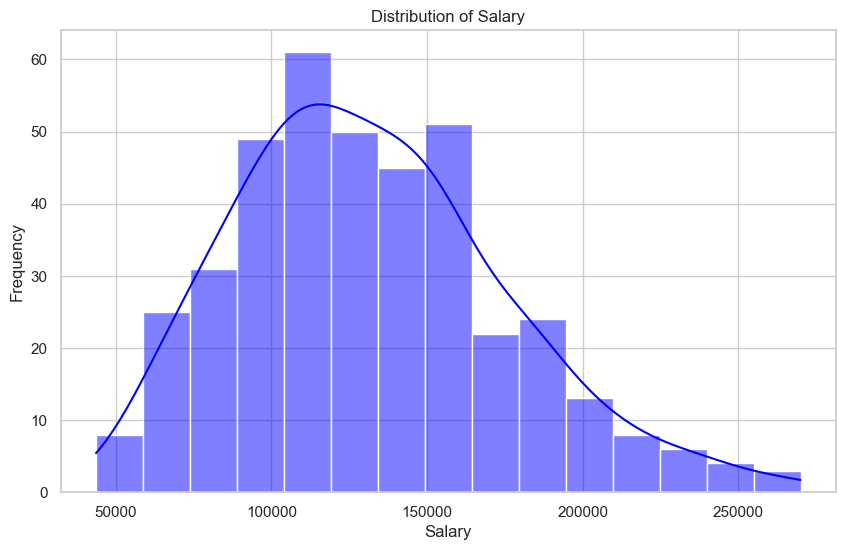

In [69]:
# Set plot style
sns.set(style="whitegrid")

# Distribution of Salary
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True, color='blue')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

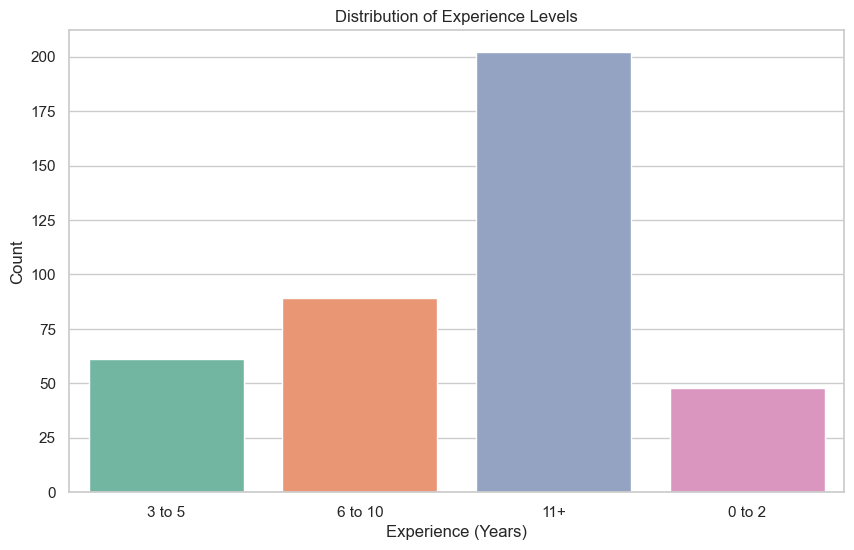

In [70]:
# Distribution of Experience (Years)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Experience (Years)', palette='Set2')
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience (Years)')
plt.ylabel('Count')
plt.show()

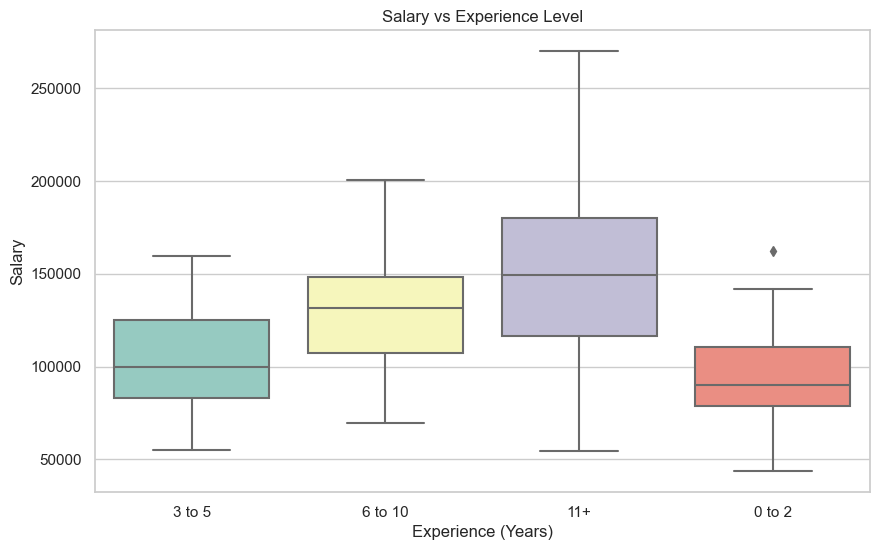

In [71]:
# Salary vs Experience (Years)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Experience (Years)', y='Salary', data=df, palette='Set3')
plt.title('Salary vs Experience Level')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.show()

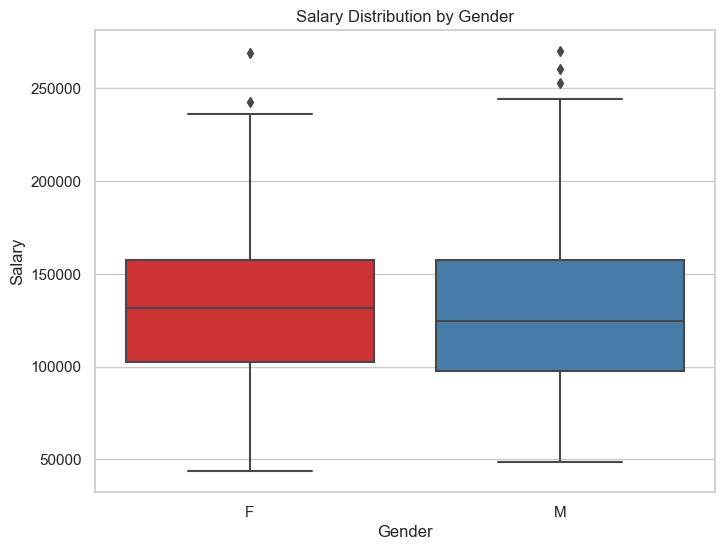

In [72]:
# Salary vs Gender

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Salary', data=df, palette='Set1')
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

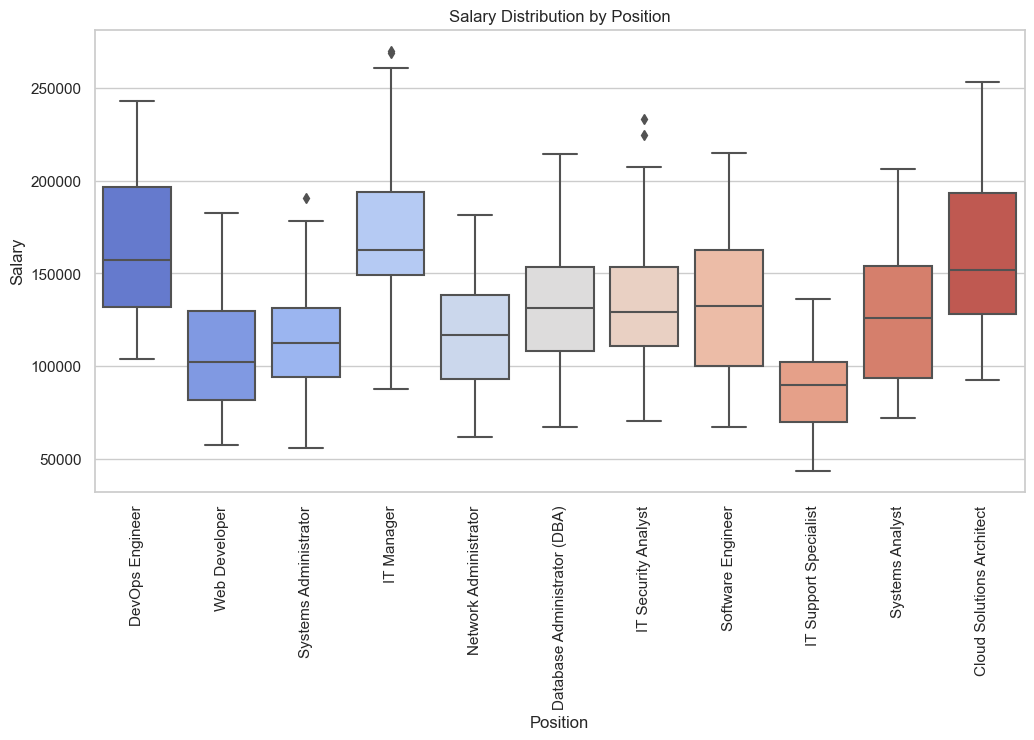

In [73]:
# Salary by Position
plt.figure(figsize=(12, 6))
sns.boxplot(x='Position', y='Salary', data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Salary Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [74]:
# Pairplot for numerical features
#sns.pairplot(df[['Salary', 'Compansation']])
#plt.title('Pairplot of Salary and Compensation')
#plt.show()

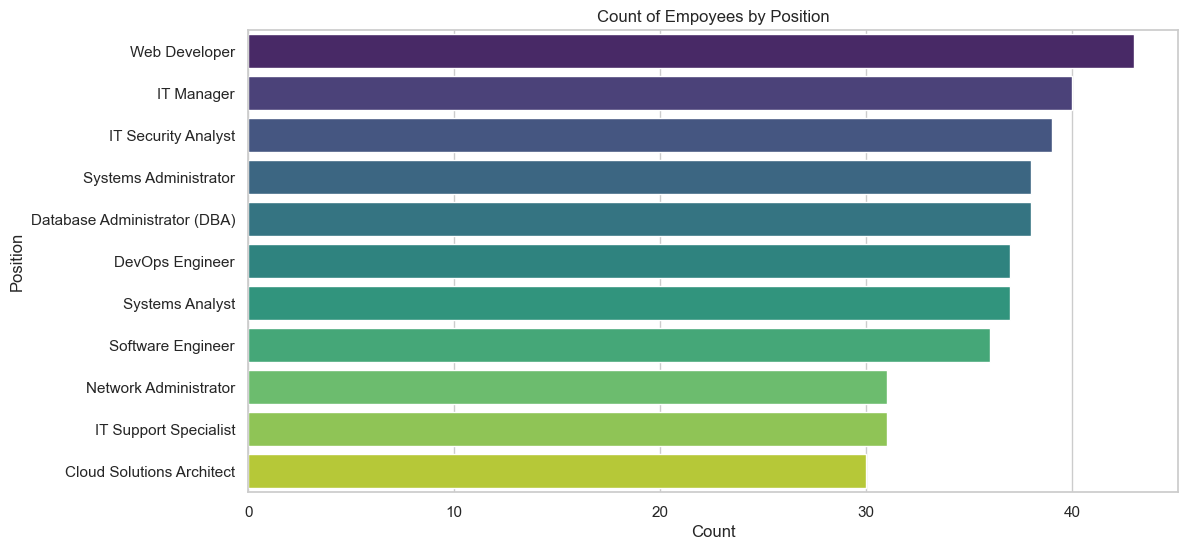

In [75]:
# Count of Positions
plt.figure(figsize=(12, 6))
sns.countplot(y='Position', data=df, palette='viridis', order=df['Position'].value_counts().index)
plt.title('Count of Empoyees by Position')
plt.xlabel('Count')
plt.ylabel('Position')
plt.show()

In [76]:
def create_basic_compansation_col(text):
    if (text=='Web Developer') | (text=='DevOps Engineer'):
        return 35000
    elif (text=='System Analyst') | (text=='IT Manager'):
        return 40000
    elif (text=='System Administrator') | (text=='IT Support Specialist'):
        return 30000
    elif (text=='Cloud Solutions Architect') | (text=='Network Administrator'):
        return 45000
    elif (text=='System Engineer') | (text=='Database Administrator (DBA)'):
        return 37000
    else:
        return 40000

In [77]:
df['Com_0to2years']=df['Position'].apply(create_basic_compansation_col)

In [78]:
df.head()

,ID,Gender,Experience (Years),Position,Salary,Com_0to2years
0,1,F,3 to 5,DevOps Engineer,109976,35000
1,2,M,6 to 10,DevOps Engineer,120088,35000
2,3,M,11+,Web Developer,181301,35000
3,4,M,6 to 10,Systems Administrator,77530,40000
4,5,F,11+,Systems Administrator,152397,40000


In [79]:
def compansation_increment_other_than0to2__years(text):
    if text=='3 to 5':
        return 15000
    elif text=='6 to 10':
        return 30000
    elif text=='11+':
        return 50000
    else:
        return 0

In [80]:
df['Compansion_other_than_0to2']=df['Experience (Years)'].apply(compansation_increment_other_than0to2__years)

In [81]:
df.head()

,ID,Gender,Experience (Years),Position,Salary,Com_0to2years,Compansion_other_than_0to2
0,1,F,3 to 5,DevOps Engineer,109976,35000,15000
1,2,M,6 to 10,DevOps Engineer,120088,35000,30000
2,3,M,11+,Web Developer,181301,35000,50000
3,4,M,6 to 10,Systems Administrator,77530,40000,30000
4,5,F,11+,Systems Administrator,152397,40000,50000


In [82]:
# Now add last two columns to have a real compansation
df['Compansation']=df['Com_0to2years']+df['Compansion_other_than_0to2']

In [83]:
df.head()

,ID,Gender,Experience (Years),Position,Salary,Com_0to2years,Compansion_other_than_0to2,Compansation
0,1,F,3 to 5,DevOps Engineer,109976,35000,15000,50000
1,2,M,6 to 10,DevOps Engineer,120088,35000,30000,65000
2,3,M,11+,Web Developer,181301,35000,50000,85000
3,4,M,6 to 10,Systems Administrator,77530,40000,30000,70000
4,5,F,11+,Systems Administrator,152397,40000,50000,90000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          400 non-null    int64 
 1   Gender                      400 non-null    object
 2   Experience (Years)          400 non-null    object
 3   Position                    400 non-null    object
 4   Salary                      400 non-null    int64 
 5   Com_0to2years               400 non-null    int64 
 6   Compansion_other_than_0to2  400 non-null    int64 
 7   Compansation                400 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 25.1+ KB


In [85]:
df.drop(['Compansion_other_than_0to2','Com_0to2years'],axis=1,inplace=True)

In [86]:
df.head()

,ID,Gender,Experience (Years),Position,Salary,Compansation
0,1,F,3 to 5,DevOps Engineer,109976,50000
1,2,M,6 to 10,DevOps Engineer,120088,65000
2,3,M,11+,Web Developer,181301,85000
3,4,M,6 to 10,Systems Administrator,77530,70000
4,5,F,11+,Systems Administrator,152397,90000


In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
lb=LabelEncoder()
ss=StandardScaler()

In [88]:
cat_cols=df.select_dtypes(include=['object'])
for i in cat_cols.columns:
    df[i]=lb.fit_transform(df[i])

In [89]:
df.head()

,ID,Gender,Experience (Years),Position,Salary,Compansation
0,1,0,2,2,109976,50000
1,2,1,3,2,120088,65000
2,3,1,1,10,181301,85000
3,4,1,3,8,77530,70000
4,5,0,1,8,152397,90000


In [90]:
df.duplicated().sum()

0

In [132]:
df.corr()

,ID,Gender,Experience (Years),Position,Salary,Compansation
ID,1.000000,-0.013121,0.018712,0.085791,0.008680,0.078621
Gender,-0.013121,1.000000,-0.012699,-0.033302,-0.021238,-0.020387
Experience (Years),0.018712,-0.012699,1.000000,-0.037237,-0.015420,-0.049145
Position,0.085791,-0.033302,-0.037237,1.000000,-0.350686,-0.049714
Salary,0.008680,-0.021238,-0.015420,-0.350686,1.000000,0.537134
Compansation,0.078621,-0.020387,-0.049145,-0.049714,0.537134,1.000000


<Axes: >

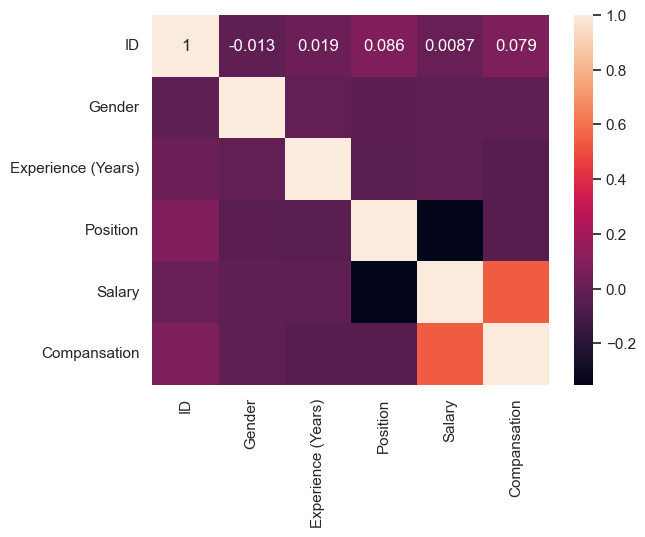

In [92]:
sns.heatmap(df.corr(),annot=True)

# Perform the train test split

In [133]:
# Perform the train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Compansation',axis=1),df['Compansation'],test_size=0.2,random_state=5)

In [134]:
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

# Train the model

In [135]:
# Perform the Random Forest
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [136]:
rfr=RandomForestRegressor().fit(X_train,y_train)

In [137]:
ypre=rfr.predict(X_test)

In [138]:
from sklearn.metrics import r2_score,mean_squared_error

In [139]:
r2_score(ypre,y_test)

0.9856970723883841

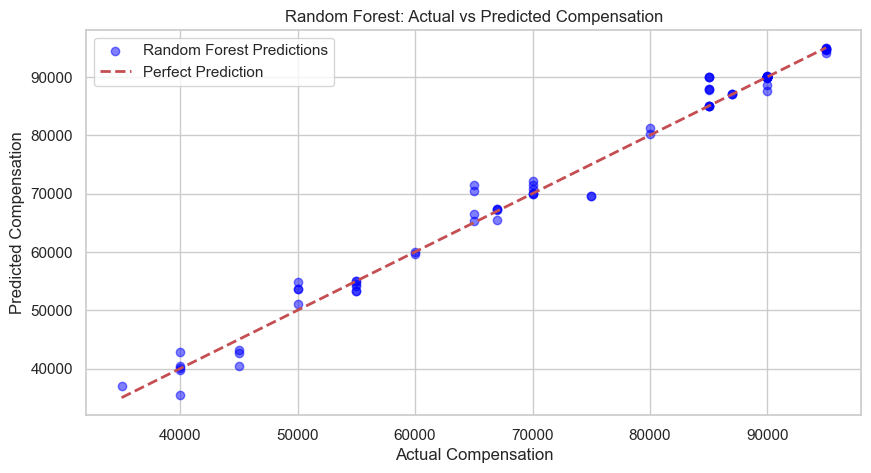

In [140]:
# Plot for Random Forest
plt.figure(figsize=(10, 5))
plt.scatter(y_test, ypre, color='blue', label='Random Forest Predictions', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Compensation')
plt.ylabel('Predicted Compensation')
plt.title('Random Forest: Actual vs Predicted Compensation')
plt.legend()
plt.show()


# GradientBoostingRegressor

In [141]:
# GradientBoostingRegressor
gbr=GradientBoostingRegressor().fit(X_train,y_train)
ypre=gbr.predict(X_test)
r2_score(ypre,y_test)

0.990787234897829

In [143]:
mean_squared_error(y_test,ypre)

2862987.4959102096

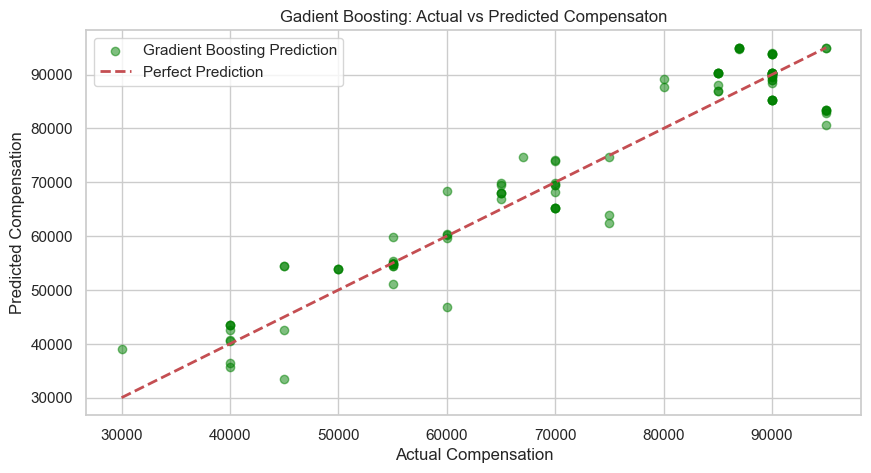

In [111]:
# Plot for Gradient Boosting
plt.figure(figsize=(10, 5))
plt.scatter(y_test, ypre, color='green', label='Gradient Boosting Prediction', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Compensation')
plt.ylabel('Predicted Compensation')
plt.title('Gadient Boosting: Actual vs Predicted Compensaton')
plt.legend()
plt.show()
